In [ ]:
# python code to plot results contained in jobs/ directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# EXCHANGE DT

In [2]:
RESULTS_DIR="./jobs/exchange-dt/"
MAX_NODES = 7
data = np.zeros((4, MAX_NODES))

for i in range(MAX_NODES):
    data[:, i] = np.fromfile(RESULTS_DIR + "scaling-" + str(i + 1) + ".txt", sep='\n')

# convert to milliseconds
data = data * 1000.0

# number of processes
p = np.arange(1, MAX_NODES + 1) * 36

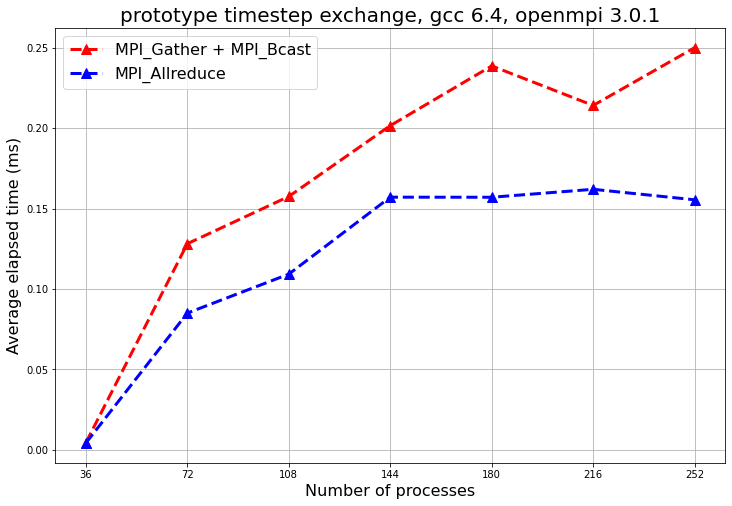

In [11]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p, data[0, :], '^--', label="MPI_Gather + MPI_Bcast", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(p, data[1, :], '^--', label="MPI_Allreduce", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("prototype timestep exchange, gcc 6.4, openmpi 3.0.1", fontsize=20)
ax.set_xlabel("Number of processes", fontsize=16)
ax.set_xticks(p)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16)
ax.grid(True);

# fig.savefig("exchange-dt-gcc+openmpi.png", dpi=100, facecolor='w')

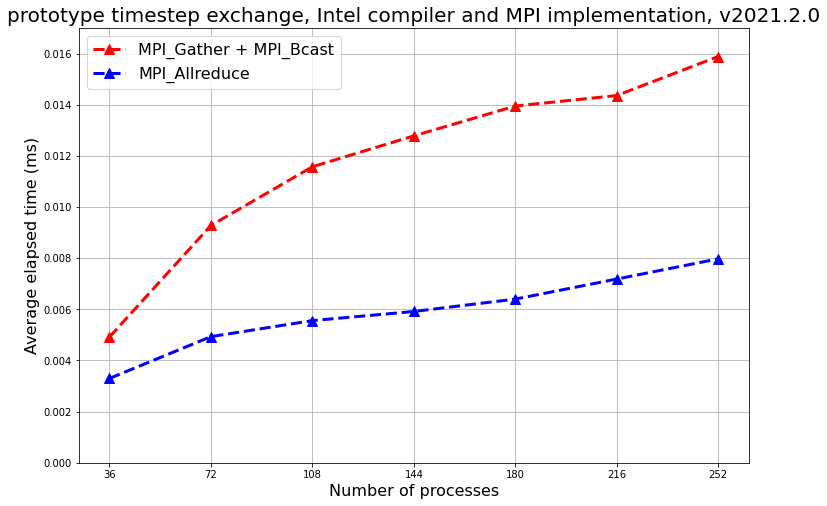

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p, data[2, :], '^--', label="MPI_Gather + MPI_Bcast", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(p, data[3, :], '^--', label="MPI_Allreduce", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("prototype timestep exchange, Intel compiler and MPI implementation, v2021.2.0", fontsize=20)
ax.set_xlabel("Number of processes", fontsize=16)
ax.set_xticks(p)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16)
ax.set_ylim(0.0, 0.017)
ax.grid(True);

# fig.savefig("exchange-dt-intel.png", dpi=100, facecolor='w')

In [ ]:
# SHM

In [17]:
# first run: intel v2021.2.0
wct_ptp = [
0.00018951897218357771,
0.00013449247484095394,
0.00011412415560334921,
9.4917667796835299e-05,
7.7420479035936299e-05,
6.7036786116659642e-05]

wct_shm_0 = [
0.00023686282872222364,
0.00015194011398125441,
0.00012397716264240445,
0.00010799924517050386,
8.8732326054014263e-05,
7.8824578318744892e-05]

wct_shm_1 = [
0.00025129264348652212,
0.0001785004329867661,
0.00014475586870685219,
0.00012711204611696303,
0.0001069551669061184,
9.3420554767362769e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_shm_0 = np.array(wct_shm_0) * 1000
wct_shm_1 = np.array(wct_shm_1) * 1000

# these are just the average message sizes for the strong scaling
# benchmark for nodes in [1,7] (iSALE3D with 2D domain decomp)
mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

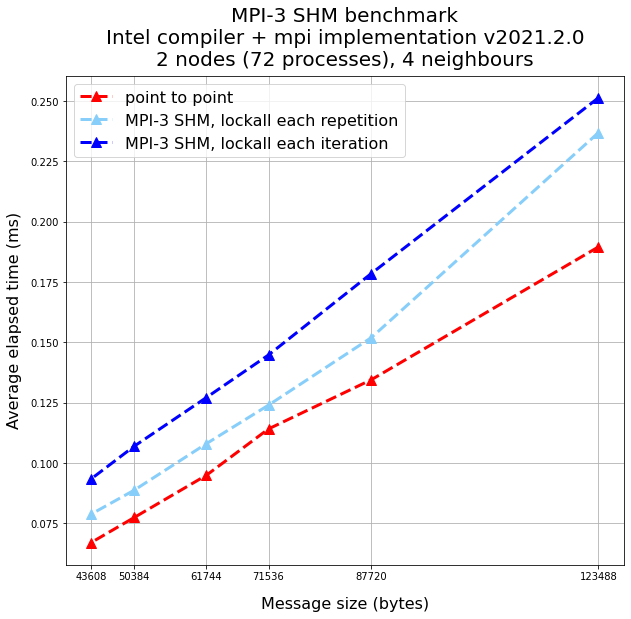

In [19]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_shm_0, '^--', label="MPI-3 SHM, lockall each repetition", 
        linewidth=linewidth, markersize=markersize, color='lightskyblue')
ax.plot(mean_msg_sizes, wct_shm_1, '^--', label="MPI-3 SHM, lockall each iteration", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("MPI-3 SHM benchmark\nIntel compiler + mpi implementation v2021.2.0\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

# fig.savefig("shm-intel2021.png", dpi=100, facecolor='w')

In [22]:
# second run: intel v17.0.4
wct_ptp = [
0.00012559795379638673,
8.9413881301879882e-05,
7.2842121124267576e-05,
6.9984912872314456e-05,
5.6124925613403321e-05,
4.5634984970092776e-05]

wct_shm_0 = [
0.00016367888450622559,
0.00011801600456237793,
9.71379280090332e-05,
8.4656000137329097e-05,
7.1288108825683598e-05,
6.2941074371337897e-05]

wct_shm_1 = [
0.00016265797615051269,
0.0001177828311920166,
9.8325967788696287e-05,
8.5798025131225586e-05,
7.0720911026000977e-05,
6.3154935836791997e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_shm_0 = np.array(wct_shm_0) * 1000
wct_shm_1 = np.array(wct_shm_1) * 1000

# these are just the average message sizes for the strong scaling
# benchmark for nodes in [1,7] (iSALE3D with 2D domain decomp)
mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

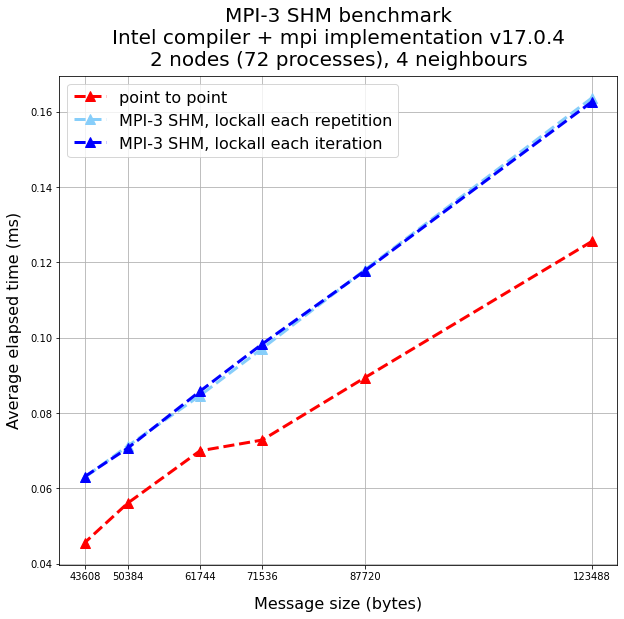

In [48]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_shm_0, '^--', label="MPI-3 SHM, lockall each repetition", 
        linewidth=linewidth, markersize=markersize, color='lightskyblue')
ax.plot(mean_msg_sizes, wct_shm_1, '^--', label="MPI-3 SHM, lockall each iteration", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("MPI-3 SHM benchmark\nIntel compiler + mpi implementation v17.0.4\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

# fig.savefig("shm-intel17.png", dpi=100, facecolor='w')

In [ ]:
# PERSISTENT COMMUNICATION

In [50]:
# first run: intel v2021.2.0
wct_ptp = [
0.00018951897218357771,
0.00013449247484095394,
0.00011412415560334921,
9.4917667796835299e-05,
7.7420479035936299e-05,
6.7036786116659642e-05]

wct_pcomm = [
0.00018939682003110648,
0.00013485177210532129,
0.00011154193407855927,
9.5219553913921117e-05,
7.7584274811670186e-05,
6.6807208582758906e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_pcomm = np.array(wct_pcomm) * 1000

mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

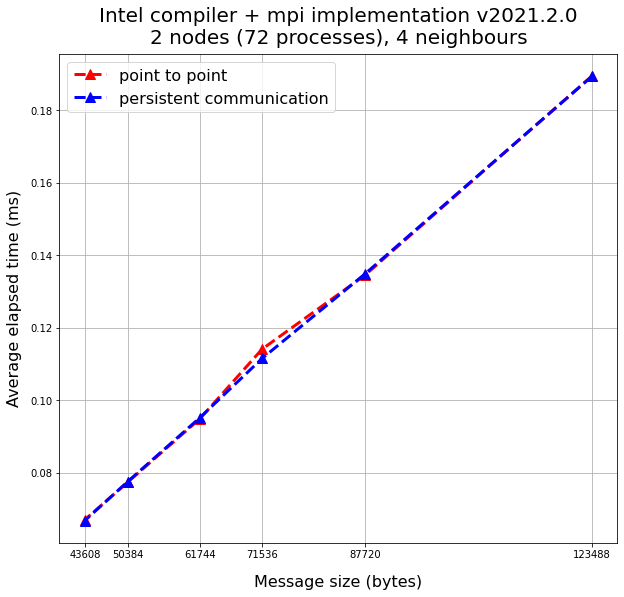

In [52]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_pcomm, '^--', label="persistent communication", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("Intel compiler + mpi implementation v2021.2.0\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

fig.savefig("persistent-comm-intel21.png", dpi=100, facecolor='w')

In [127]:
# second run: intel v17.0.4
wct_ptp = [
0.00012559795379638673,
8.9413881301879882e-05,
7.2842121124267576e-05,
6.9984912872314456e-05,
5.6124925613403321e-05,
4.5634984970092776e-05]

wct_pcomm = [
0.000125913143157959,
8.9517116546630857e-05,
7.412409782409668e-05,
7.0975065231323236e-05,
5.6793212890625e-05,
4.6353816986083984e-05]

# to ms
wct_ptp = np.array(wct_ptp) * 1000
wct_pcomm = np.array(wct_pcomm) * 1000

mean_msg_sizes = [123488, 87720, 71536, 61744, 50384, 43608]

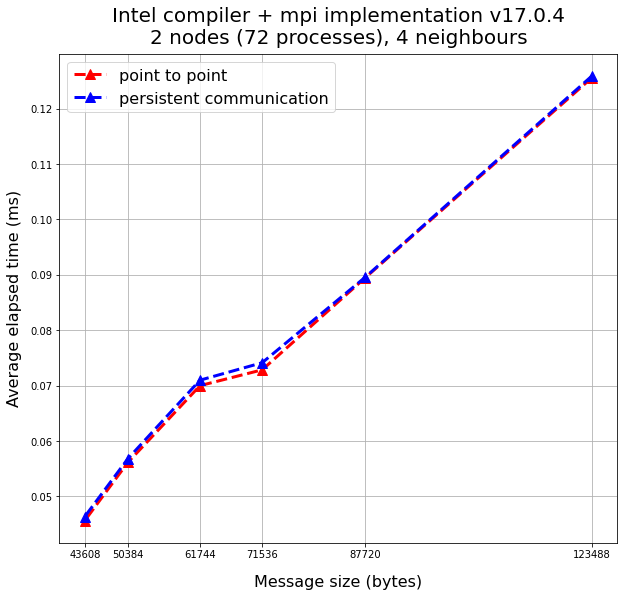

In [128]:
linewidth = 3
markersize = 10
fig, ax = plt.subplots(figsize=(10, 9))

# fig.subplots_adjust(top=1.)

ax.plot(mean_msg_sizes, wct_ptp, '^--', label="point to point", 
        linewidth=linewidth, markersize=markersize, color='red')
ax.plot(mean_msg_sizes, wct_pcomm, '^--', label="persistent communication", 
        linewidth=linewidth, markersize=markersize, color='blue')
ax.legend(loc='best', fontsize=16)
ax.set_title("Intel compiler + mpi implementation v17.0.4\n2 nodes (72 processes), 4 neighbours", 
             fontsize=20, pad=10)
ax.set_xlabel("Message size (bytes)", fontsize=16, labelpad=15)
ax.set_ylabel("Average elapsed time (ms)", fontsize=16, labelpad=8)
ax.set_xticks(mean_msg_sizes)
ax.grid(True);

# fig.savefig("persistent-comm-intel17.png", dpi=100, facecolor='w')

In [ ]:
# 2D DOMAIN DECOMPOSITION.. not related to this prototype -- sorry, I'm just putting it here as it's handy

# TRACERS_OFF

In [28]:
PROCESSES = np.array([1, 36, 72, 108, 144, 216, 288])

# mpi-communication branch wall clock times
WCT_1 = np.array([2.041963E+04, 8.724865E+02, 4.769922E+02, 3.465115E+02, 
                  2.881871E+02, 2.208104E+02, 1.855679E+02])
# mpi-2d-decomposition branch wall clock times
WCT_2 = np.array([np.NAN, 8.268870E+02, 4.349156E+02, 3.036318E+02, 
                  2.441523E+02, 1.737583E+02, 1.537882E+02])

# speedup = T serial / T parallel
T_serial = WCT_1[0]
SPEEDUP_1 = T_serial / WCT_1
SPEEDUP_2 = T_serial / WCT_2

# strong scaling = speedup / number of processes
STRONG_SCALING_1 = SPEEDUP_1 / PROCESSES
STRONG_SCALING_2 = SPEEDUP_2 / PROCESSES

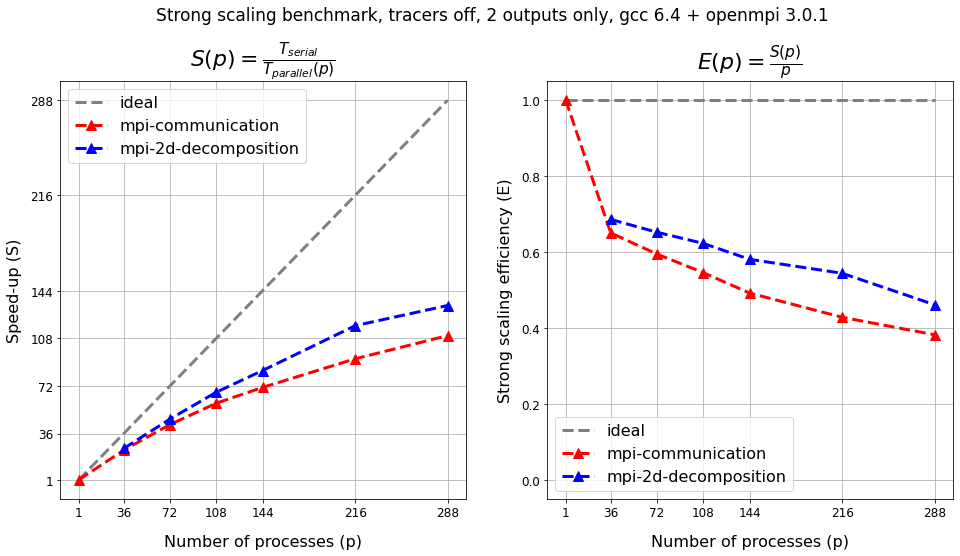

In [29]:
linewidth = 3
markersize = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Strong scaling benchmark, tracers off, 2 outputs only, gcc 6.4 + openmpi 3.0.1", fontsize=17)
fig.subplots_adjust(top=0.85)

# speedup
ax1.plot(PROCESSES, PROCESSES, '--', label="ideal", linewidth=linewidth, color='grey')
ax1.plot(PROCESSES, SPEEDUP_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')#, markerfacecolor='none')
ax1.plot(PROCESSES, SPEEDUP_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')#, markerfacecolor='none')
ax1.legend(loc='best', fontsize=16)
ax1.set_title(r"$S(p)=\frac{T_{serial}}{T_{parallel}(p)}$", fontsize=22)
ax1.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax1.set_ylabel("Speed-up (S)", fontsize=16, labelpad=8)
ax1.set_xticks(PROCESSES)
ax1.set_yticks(PROCESSES)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True);

# strong scaling
ax2.plot(PROCESSES, [1] * len(PROCESSES), '--', label="ideal", linewidth=linewidth, color='grey')
ax2.plot(PROCESSES, STRONG_SCALING_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')
ax2.plot(PROCESSES, STRONG_SCALING_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')
ax2.legend(loc='best', fontsize=16)
ax2.set_title(r"$E(p)=\frac{S(p)}{p}$", fontsize=22)
ax2.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax2.set_ylabel("Strong scaling efficiency (E)", fontsize=16, labelpad=8)
# ax2.set_xlim(-0.05, 300)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(PROCESSES)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True);

# fig.savefig("troff-strong-scaling.png", dpi=200, facecolor='w')

In [ ]:
# 1.3M TRACERS

In [99]:
PROCESSES = np.array([1, 36, 72, 108, 144, 216, 288])

# mpi-communication branch wall clock times
TR1_WCT_1 = np.array([1.903111E+04, 8.643047E+02, 4.775070E+02, 3.476395E+02, 
                      2.862719E+02, 2.166406E+02, 1.902290E+02])
# mpi-2d-decomposition branch wall clock times
TR1_WCT_2 = np.array([np.NAN, 8.372850E+02, 4.343893E+02, 3.027028E+02, 
                      2.413154E+02, 1.835561E+02, 1.560953E+02])

# speedup = T serial / T parallel
TR1_T_serial = TR1_WCT_1[0]
TR1_SPEEDUP_1 = TR1_T_serial / TR1_WCT_1
TR1_SPEEDUP_2 = TR1_T_serial / TR1_WCT_2

# strong scaling = speedup / number of processes
TR1_STRONG_SCALING_1 = TR1_SPEEDUP_1 / PROCESSES
TR1_STRONG_SCALING_2 = TR1_SPEEDUP_2 / PROCESSES

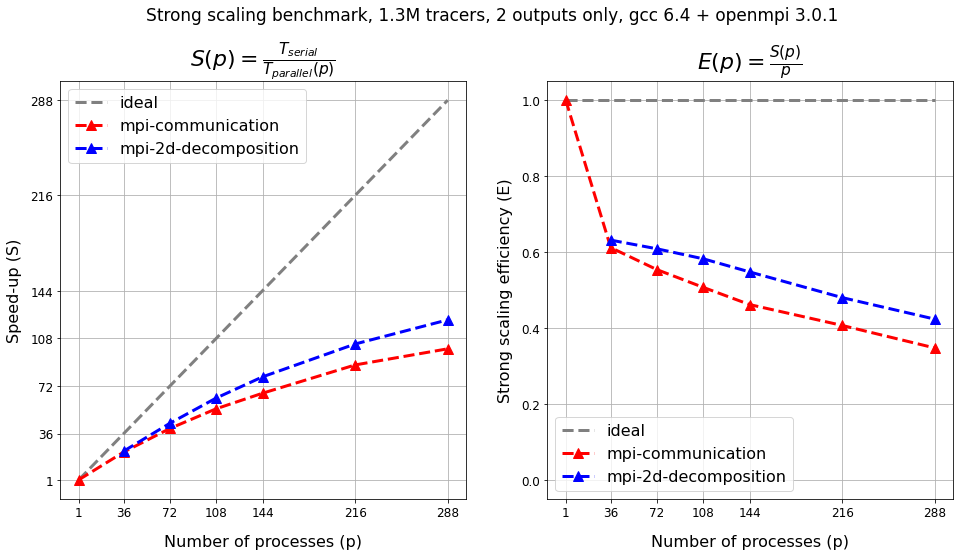

In [105]:
linewidth = 3
markersize = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Strong scaling benchmark, 1.3M tracers, 2 outputs only, gcc 6.4 + openmpi 3.0.1", fontsize=17)
fig.subplots_adjust(top=0.85)

# speedup
ax1.plot(PROCESSES, PROCESSES, '--', label="ideal", linewidth=linewidth, color='grey')
ax1.plot(PROCESSES, TR1_SPEEDUP_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')#, markerfacecolor='none')
ax1.plot(PROCESSES, TR1_SPEEDUP_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')#, markerfacecolor='none')
ax1.legend(loc='best', fontsize=16)
ax1.set_title(r"$S(p)=\frac{T_{serial}}{T_{parallel}(p)}$", fontsize=22)
ax1.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax1.set_ylabel("Speed-up (S)", fontsize=16, labelpad=8)
ax1.set_xticks(PROCESSES)
ax1.set_yticks(PROCESSES)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True);

# strong scaling
ax2.plot(PROCESSES, [1] * len(PROCESSES), '--', label="ideal", linewidth=linewidth, color='grey')
ax2.plot(PROCESSES, TR1_STRONG_SCALING_1, '^--', label="mpi-communication", 
         linewidth=linewidth, markersize=markersize, color='red')
ax2.plot(PROCESSES, TR1_STRONG_SCALING_2, '^--', label="mpi-2d-decomposition", 
         linewidth=linewidth, markersize=markersize, color='blue')
ax2.legend(loc='best', fontsize=16)
ax2.set_title(r"$E(p)=\frac{S(p)}{p}$", fontsize=22)
ax2.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax2.set_ylabel("Strong scaling efficiency (E)", fontsize=16, labelpad=8)
# ax2.set_xlim(-0.05, 300)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(PROCESSES)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True);

#fig.savefig("tr1-strong-scaling.png", dpi=100, facecolor='w');

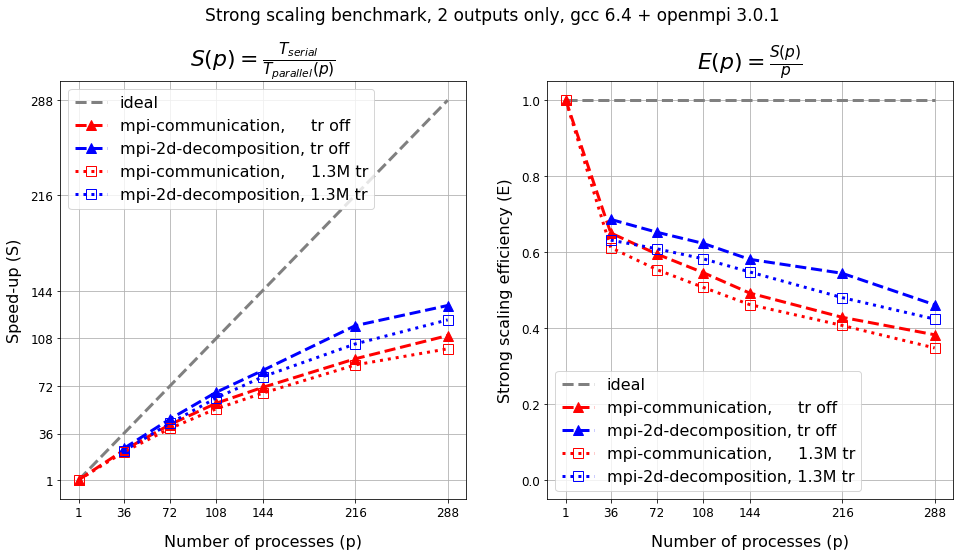

In [106]:
linewidth = 3
markersize = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Strong scaling benchmark, 2 outputs only, gcc 6.4 + openmpi 3.0.1", fontsize=17)
fig.subplots_adjust(top=0.85)

# speedup
ax1.plot(PROCESSES, PROCESSES, '--', label="ideal", linewidth=linewidth, color='grey')

ax1.plot(PROCESSES, SPEEDUP_1, '^--', label="mpi-communication,     tr off", 
         linewidth=linewidth, markersize=markersize, color='red')#, markerfacecolor='none')
ax1.plot(PROCESSES, SPEEDUP_2, '^--', label="mpi-2d-decomposition, tr off", 
         linewidth=linewidth, markersize=markersize, color='blue')#, markerfacecolor='none')

ax1.plot(PROCESSES, TR1_SPEEDUP_1, 's:', label="mpi-communication,     1.3M tr", 
         linewidth=linewidth, markersize=markersize, color='red', markerfacecolor='none')
ax1.plot(PROCESSES, TR1_SPEEDUP_2, 's:', label="mpi-2d-decomposition, 1.3M tr", 
         linewidth=linewidth, markersize=markersize, color='blue', markerfacecolor='none')

ax1.legend(loc='best', fontsize=16)
ax1.set_title(r"$S(p)=\frac{T_{serial}}{T_{parallel}(p)}$", fontsize=22)
ax1.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax1.set_ylabel("Speed-up (S)", fontsize=16, labelpad=8)
ax1.set_xticks(PROCESSES)
ax1.set_yticks(PROCESSES)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True);

# strong scaling
ax2.plot(PROCESSES, [1] * len(PROCESSES), '--', label="ideal", linewidth=linewidth, color='grey')

ax2.plot(PROCESSES, STRONG_SCALING_1, '^--', label="mpi-communication,     tr off", 
         linewidth=linewidth, markersize=markersize, color='red')
ax2.plot(PROCESSES, STRONG_SCALING_2, '^--', label="mpi-2d-decomposition, tr off", 
         linewidth=linewidth, markersize=markersize, color='blue')

ax2.plot(PROCESSES, TR1_STRONG_SCALING_1, 's:', label="mpi-communication,     1.3M tr", 
         linewidth=linewidth, markersize=markersize, color='red', markerfacecolor='none')
ax2.plot(PROCESSES, TR1_STRONG_SCALING_2, 's:', label="mpi-2d-decomposition, 1.3M tr", 
         linewidth=linewidth, markersize=markersize, color='blue', markerfacecolor='none')

ax2.legend(loc='best', fontsize=16)
ax2.set_title(r"$E(p)=\frac{S(p)}{p}$", fontsize=22)
ax2.set_xlabel("Number of processes (p)", fontsize=16, labelpad=15)
ax2.set_ylabel("Strong scaling efficiency (E)", fontsize=16, labelpad=8)
# ax2.set_xlim(-0.05, 300)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(PROCESSES)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True);

#fig.savefig("tr-strong-scaling.png", dpi=100, facecolor='w')

In [102]:
CORE_H     = (WCT_2 * PROCESSES)[1:] / 60.0 / 60.0
TR1_CORE_H = (TR1_WCT_2 * PROCESSES)[1:] / 60.0 / 60.0

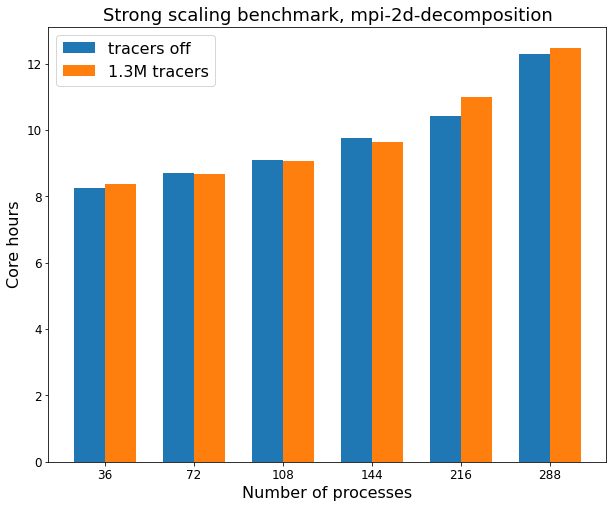

In [107]:
labels = PROCESSES[1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, CORE_H, width, label='tracers off')
rects2 = ax.bar(x + width/2, TR1_CORE_H, width, label='1.3M tracers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Core hours', fontsize=16)
ax.set_xlabel('Number of processes', fontsize=16)
ax.set_title('Strong scaling benchmark, mpi-2d-decomposition', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='best', fontsize=16);

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()
# fig.savefig("strong-scaling-coreh.png", dpi=100, facecolor='w')

In [134]:
# CORE HOURS for strong scaling with 72 processes and 10M tracers
# 8.9 vs 8.7 of 1.3M tracers
4.454049E+02 * 72 / 60.0 / 60.0, TR1_CORE_H[1]

(8.908097999999999, 8.687786)

In [113]:
def decompose_3d(nx, ny, nz, numproc):
    b_ndivx = numproc
    b_ndivy = 1
    b_ndivz = 1
    b_ie = nx / b_ndivx
    b_je = ny / b_ndivy
    b_ke = nz / b_ndivz
    b_surface = (b_ie * b_je) + (b_ie * b_ke) + (b_je * b_ke)
    for ndivx in range(numproc+1):
        for ndivy in range(numproc+1):
            for ndivz in range(numproc+1):
                if ndivx * ndivy * ndivz == numproc:
                    ie = nx / ndivx
                    je = ny / ndivy
                    ke = nz / ndivz
                    # surface area / 2
                    surface = (ie * je) + (ie * ke) + (je * ke)
                    if surface < b_surface:
                        b_ndivx = ndivx
                        b_ndivy = ndivy
                        b_ndivz = ndivz
                        b_ie = ie
                        b_je = je
                        b_ke = ke
                        b_surface = surface
    return b_ndivx, b_ndivy, b_ndivz, b_ie, b_je, b_ke, b_surface

# nx, ny = number of cells in x, y direction
# np = number of processes
def decompose_2d(nx, ny, np):
    # best number of rows
    bnr = 1
    # best number of cols
    bnc = np
    # ie = size of each local domain in x-direction
    # je = size of each local domain in y-direction
    # bie = best ie
    # bje = best je
    bie = nx / bnr
    bje = ny / bnc
    # testing all possible nr, nc pairs
    for nr in range(2, np + 1):
        if np % nr == 0:
            nc = np / nr
            ie = nx / nr
            je = ny / nc
            # the closer ie, je are (the smallest their difference)
            # the "more square" each local domain is
            if abs(ie - je) < abs(bie - bje):
                bnr = nr
                bnc = nc
                bie = ie
                bje = je
    return bnr, bnc, bie, bje

In [121]:
def exchange_area_2d(nx, ny, nz, np):
    bie, bje = decompose_2d(nx, ny, np)[2:]
    return 2 * (bie + bje) * nz

nx = 864
ny = 238
nz = 204
P  = 288

print(f"number of processes: {P}")
print(f"exchange area 1D: {ny*nz*2}")
print(f"exchange area 2D: {int(exchange_area_2d(nx,ny,nz,P))}")
print(f"exchange area 3D: {int(decompose_3d(nx,ny,nz,P)[6]*2)}")

number of processes: 288
exchange area 1D: 97104
exchange area 2D: 21805
exchange area 3D: 16677


In [125]:
P = 288*5

print(f"number of processes: {P}")
print(f"exchange area 1D: {ny*nz*2}")
print(f"exchange area 2D: {int(exchange_area_2d(nx,ny,nz,P))}")
print(f"exchange area 3D: {int(decompose_3d(nx,ny,nz,P)[6]*2)}")

number of processes: 1440
exchange area 1D: 97104
exchange area 2D: 9751
exchange area 3D: 5695
